In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_bank_train = pd.read_csv('df_bank_train.csv', index_col=0)   #银行流水记录表
df_bank_train.head()

E:\Anaconda3-2018.12\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,user_id,time,loan_type,loan_amount,income
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


In [3]:
df_bank_train.shape

(6070197, 5)

In [4]:
columns3 = ['user_id','time']
columns4 = ['user_id','overdue']
columns5 = ['user_id','sex','job','education','marriage','residence']
df_bill_train = pd.read_csv('C:\\Users\\lkl\\Desktop\\competition\\forward\\df_bill_train.csv', index_col=0)   #账单记录表
df_browse_train = pd.read_csv('C:\\Users\\lkl\\Desktop\\competition\\forward\\df_browse_train.csv', index_col=0) #浏览信息表
df_loan_train=pd.read_table('C:\\Users\\lkl\\Desktop\\Prediction of User Loan Risk\\train\\loan_time_train.txt',names = columns3,sep=',' ) #放款时间表
df_overdue_train=pd.read_table('C:\\Users\\lkl\\Desktop\\Prediction of User Loan Risk\\train\\overdue_train.txt',names = columns4,sep=',' ) #逾期记录表
df_user_train=pd.read_table('C:\\Users\\lkl\\Desktop\\Prediction of User Loan Risk\\train\\user_info_train.txt',names = columns5,sep=',' ) #用户信息表

In [5]:
#账单记录表
df_bill_train.head()

,user_id,time,bank_id,last_bill_amount,last_repay_amount,credit_amount,cur_bill_bal,cur_bill_minrepay,cons_num,cur_bill_amount,adjust_amount,cyclic_accr,avail_bal,borrow_cash,repay_status
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [6]:
df_bill_train.shape

(2338118, 15)

In [7]:
#浏览信息表
df_browse_train.head()

,user_id,time,brows_beh,brows_num
0,34801,5926003545,173,1
1,34801,5926003545,164,4
2,34801,5926003545,38,7
3,34801,5926003545,45,1
4,34801,5926003545,110,7


In [8]:
df_browse_train.shape

(22919547, 4)

In [9]:
#放款时间表
df_loan_train.head()

,user_id,time
0,1,5914855887
1,2,5914855887
2,3,5914855887
3,4,5914855887
4,5,5914855887


In [10]:
df_loan_train.shape

(55596, 2)

In [11]:
#逾期记录表
df_overdue_train.head()

,user_id,overdue
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [12]:
df_overdue_train.shape

(55596, 2)

In [13]:
#用户信息表
df_user_train.head()

,user_id,sex,job,education,marriage,residence
0,3150,1,2,4,1,4
1,6965,1,2,4,3,2
2,1265,1,3,4,3,1
3,6360,1,2,4,3,2
4,2583,2,2,2,1,1


In [14]:
df_user_train.shape

(55596, 6)

In [15]:
#检查各个表的用户id数
print(len(df_bank_train.user_id.unique()),
     len(df_bill_train.user_id.unique()),
     len(df_browse_train.user_id.unique()),
     len(df_loan_train.user_id.unique()),
     len(df_overdue_train.user_id.unique()),
     len(df_user_train.user_id.unique()))

9294 53174 47330 55596 55596 55596


In [16]:
#筛选符合条件的银行流水记录表的用户id
df = pd.merge(left = df_bank_train, right= df_loan_train, how = 'left',on = 'user_id') 
#time_x表示流水记录时间，time_y表示放款时间，然后筛选出流水时间<放款时间的记录
t = df[(df['time_x']<=df['time_y'])]
#筛选数用户id这一列并进行去重处理
bank_user = t[['user_id']]
#drop_duplicate方法是对DataFrame格式的数据，去除特定列下面的重复行
#subset :用来指定特定的列，默认所有列
#keep : {‘first’, ‘last’, False}, default ‘first’ 删除重复项
#inplace : default False 是直接在原来数据上修改还是保留一个副本
bank_user = bank_user.drop_duplicates(subset = 'user_id',keep='first')
bank_user.info()
#银行流水记录表中符合条件的还有9269个不同用户。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9269 entries, 0 to 6069672
Data columns (total 1 columns):
user_id    9269 non-null int64
dtypes: int64(1)
memory usage: 144.8 KB


In [17]:
#筛选符合条件的账单记录表的用户id
df1 = pd.merge(left = df_bill_train, right= df_loan_train, how = 'left',on = 'user_id')
t1 = df1[(df1['time_x']<=df1['time_y'])]
bill_user = t1[['user_id']]
bill_user = bill_user.drop_duplicates(subset = 'user_id',keep='first')
bill_user.info()
#账单记录表中符合条件的还有44997个不同用户。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44997 entries, 0 to 2338115
Data columns (total 1 columns):
user_id    44997 non-null int64
dtypes: int64(1)
memory usage: 703.1 KB


In [18]:
#筛选符合条件的浏览信息表的用户id
df2 = pd.merge(left = df_browse_train, right= df_loan_train, how = 'left',on = 'user_id')
t2= df2[(df2['time_x']<=df2['time_y'])]
browse_user = t2[['user_id']]
browse_user= browse_user.drop_duplicates(subset = 'user_id',keep='first')
browse_user.info()
#浏览信息表中符合条件的还有44945个不同用户。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44945 entries, 0 to 22919430
Data columns (total 1 columns):
user_id    44945 non-null int64
dtypes: int64(1)
memory usage: 702.3 KB


In [ ]:
#筛选出这6张表共有的用户id（实际为上述的三张表共同的用户id即可）
user1 = pd.merge(left=bank_user,right=browse_user,how='inner',on = 'user_id')
user2 = pd.merge(left=user1,right=bill_user,how='inner',on = 'user_id')
user2.info()
#得出5298个用户的记录是完整的

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5298 entries, 0 to 5297
Data columns (total 1 columns):
user_id    5298 non-null int64
dtypes: int64(1)
memory usage: 82.8 KB


In [ ]:
user3 = pd.merge(left=browse_user,right=bill_user,how='inner',on = 'user_id')
user3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36485 entries, 0 to 36484
Data columns (total 1 columns):
user_id    36485 non-null int64
dtypes: int64(1)
memory usage: 570.1 KB


In [ ]:
user2.head()

,user_id
0,1265
1,2583
2,29165
3,2443
4,590


In [ ]:
user2.to_csv('C:\\Users\\lkl\\Desktop\\competition\\forward\\user2.csv')

In [ ]:
#补充特征，增加放款前账单记录表的各种统计信息sum count max min mean median std var等
bill_select = pd.merge(left=df_bill_train,right = user2,how='inner',on='user_id')
bill_select.drop(['time','bank_id'], axis=1, inplace=True)
e1=bill_select.groupby(['user_id'], as_index=False)
f1= e1['last_bill_amount','last_repay_amount','credit_amount','cur_bill_bal','cur_bill_minrepay','cons_num','cur_bill_amount','adjust_amount',
       'cyclic_accr','avail_bal','borrow_cash','repay_status']

bill_select_sum = f1.sum()
bill_select_sum.columns = ['user_id','last_bill_amount_sum','last_repay_amount_sum','credit_amount_sum','cur_bill_bal_sum',
                           'cur_bill_minrepay_sum','cons_num_sum','cur_bill_amount_sum','adjust_amount_sum','cyclic_accr_sum',
                           'avail_bal_sum','borrow_cash_sum','repay_status_sum']

bill_select_count=f1.count()
bill_select_count.columns = ['user_id', 'last_bill_amount_count', 'last_repay_amount_count','credit_amount_count','cur_bill_bal_count',
                             'cur_bill_minrepay_count','cons_num_count','cur_bill_amount_count','adjust_amount_count','cyclic_accr_count',
                             'avail_bal_count','borrow_cash_count','repay_status_count']

bill_select_max=f1.max()
bill_select_max.columns = ['user_id', 'last_bill_amount_max', 'last_repay_amount_max','credit_amount_max','cur_bill_bal_max',
                     'cur_bill_minrepay_max','cons_num_max','cur_bill_amount_max','adjust_amount_max','cyclic_accr_max',
                     'avail_bal_max','borrow_cash_max','repay_status_max']

bill_select_min=f1.min()
bill_select_min.columns = ['user_id', 'last_bill_amount_min', 'last_repay_amount_min','credit_amount_min','cur_bill_bal_min',
                     'cur_bill_minrepay_min','cons_num_min','cur_bill_amount_min','adjust_amount_min','cyclic_accr_min',
                     'avail_bal_min','borrow_cash_min','repay_status_min']

bill_select_mean=f1.mean()
bill_select_mean.columns = ['user_id', 'last_bill_amount_mean', 'last_repay_amount_mean','credit_amount_mean','cur_bill_bal_mean',
                     'cur_bill_minrepay_mean','cons_num_mean','cur_bill_amount_mean','adjust_amount_mean','cyclic_accr_mean',
                     'avail_bal_mean','borrow_cash_mean','repay_status_mean']

bill_select_median=f1.median()
bill_select_median.columns = ['user_id', 'last_bill_amount_median', 'last_repay_amount_median','credit_amount_median','cur_bill_bal_median',
                     'cur_bill_minrepay_median','cons_num_median','cur_bill_amount_median','adjust_amount_median','cyclic_accr_median',
                     'avail_bal_median','borrow_cash_median','repay_status_median']

bill_select_std=f1.std()
bill_select_std.columns = ['user_id', 'last_bill_amount_std', 'last_repay_amount_std','credit_amount_std','cur_bill_bal_std',
                     'cur_bill_minrepay_std','cons_num_std','cur_bill_amount_std','adjust_amount_std','cyclic_accr_std',
                     'avail_bal_std','borrow_cash_std','repay_status_std']

bill_select_var=f1.var()
bill_select_var.columns = ['user_id', 'last_bill_amount_var', 'last_repay_amount_var','credit_amount_var','cur_bill_bal_var',
                     'cur_bill_minrepay_var','cons_num_var','cur_bill_amount_var','adjust_amount_var','cyclic_accr_var',
                     'avail_bal_var','borrow_cash_var','repay_status_var']

In [ ]:
bill_select_std = bill_select_std.fillna(0)
bill_select_var = bill_select_var.fillna(0)

In [ ]:
bill_select = pd.merge(left=bill_select_sum,right =bill_select_count,how = 'left',on='user_id')
bill_select = pd.merge(left=bill_select,right =bill_select_max,how = 'left',on='user_id')
bill_select = pd.merge(left=bill_select,right =bill_select_min,how = 'left',on='user_id')
bill_select = pd.merge(left=bill_select,right =bill_select_mean,how = 'left',on='user_id')
bill_select = pd.merge(left=bill_select,right =bill_select_median,how = 'left',on='user_id')
bill_select_std.drop(['user_id'], axis=1, inplace=True)
bill_select_var.drop(['user_id'], axis=1, inplace=True)
bill_select = bill_select.join(bill_select_std)
bill_select = bill_select.join(bill_select_var)
#bill_select = pd.merge(left=bill_select,right =bill_select_std,how = 'left',on='user_id')
#bill_select = pd.merge(left=bill_select,right =bill_select_var,how = 'left',on='user_id')
bill_select.shape

(5298, 97)

In [ ]:
bill_select['last_repay_amount_sum - last_bill_amount_sum']=bill_select_sum['last_repay_amount_sum']-bill_select_sum['last_bill_amount_sum']
bill_select['credit_amount_sum - cur_bill_bal_sum']=bill_select_sum['credit_amount_sum']-bill_select_sum['cur_bill_bal_sum']
bill_select['avail_bal_sum - borrow_cash_sum']=bill_select_sum['avail_bal_sum']-bill_select_sum['borrow_cash_sum']
bill_select['cur_bill_minrepay_sum + cyclic_accr_sum']=bill_select_sum['cur_bill_minrepay_sum']+bill_select_sum['cyclic_accr_sum']

bill_select['last_repay_amount_max - last_bill_amount_max']=bill_select_max['last_repay_amount_max']-bill_select_max['last_bill_amount_max']
bill_select['credit_amount_max - cur_bill_bal_max']=bill_select_max['credit_amount_max']-bill_select_max['cur_bill_bal_max']
bill_select['avail_bal_max - borrow_cash_max']=bill_select_max['avail_bal_max']-bill_select_max['borrow_cash_max']
bill_select['cur_bill_minrepay_max + cyclic_accr_max']=bill_select_max['cur_bill_minrepay_max']+bill_select_max['cyclic_accr_max']

bill_select['last_repay_amount_min - last_bill_amount_min']=bill_select_min['last_repay_amount_min']-bill_select_min['last_bill_amount_min']
bill_select['credit_amount_min - cur_bill_bal_min']=bill_select_min['credit_amount_min']-bill_select_min['cur_bill_bal_min']
bill_select['avail_bal_min - borrow_cash_min']=bill_select_min['avail_bal_min']-bill_select_min['borrow_cash_min']
bill_select['cur_bill_minrepay_min + cyclic_accr_min']=bill_select_min['cur_bill_minrepay_min']+bill_select_min['cyclic_accr_min']

bill_select['last_repay_amount_mean - last_bill_amount_mean']=bill_select_mean['last_repay_amount_mean']-bill_select_mean['last_bill_amount_mean']
bill_select['credit_amount_mean - cur_bill_bal_mean']=bill_select_mean['credit_amount_mean']-bill_select_mean['cur_bill_bal_mean']
bill_select['avail_bal_mean - borrow_cash_mean']=bill_select_mean['avail_bal_mean']-bill_select_mean['borrow_cash_mean']
bill_select['cur_bill_minrepay_mean + cyclic_accr_mean']=bill_select_mean['cur_bill_minrepay_mean']+bill_select_mean['cyclic_accr_mean']

bill_select['last_repay_amount_median - last_bill_amount_median']=bill_select_median['last_repay_amount_median']-bill_select_median['last_bill_amount_median']
bill_select['credit_amount_median - cur_bill_bal_median']=bill_select_median['credit_amount_median']-bill_select_median['cur_bill_bal_median']
bill_select['avail_bal_median - borrow_cash_median']=bill_select_median['avail_bal_median']-bill_select_median['borrow_cash_median']
bill_select['cur_bill_minrepay_median + cyclic_accr_median']=bill_select_median['cur_bill_minrepay_median']+bill_select_median['cyclic_accr_median']

bill_select['last_repay_amount_std - last_bill_amount_std']=bill_select_std['last_repay_amount_std']-bill_select_std['last_bill_amount_std']
bill_select['credit_amount_std - cur_bill_bal_std']=bill_select_std['credit_amount_std']-bill_select_std['cur_bill_bal_std']
bill_select['avail_bal_std - borrow_cash_std']=bill_select_std['avail_bal_std']-bill_select_std['borrow_cash_std']
bill_select['cur_bill_minrepay_std + cyclic_accr_std']=bill_select_std['cur_bill_minrepay_std']+bill_select_std['cyclic_accr_std']

bill_select['last_repay_amount_var - last_bill_amount_var']=bill_select_var['last_repay_amount_var']-bill_select_var['last_bill_amount_var']
bill_select['credit_amount_var - cur_bill_bal_var']=bill_select_var['credit_amount_var']-bill_select_var['cur_bill_bal_var']
bill_select['avail_bal_var - borrow_cash_var']=bill_select_var['avail_bal_var']-bill_select_var['borrow_cash_var']
bill_select['cur_bill_minrepay_var + cyclic_accr_var']=bill_select_var['cur_bill_minrepay_var']+bill_select_var['cyclic_accr_var']

bill_select.shape

(5298, 125)

In [ ]:
bill_select.head()

,user_id,last_bill_amount_sum,last_repay_amount_sum,credit_amount_sum,cur_bill_bal_sum,cur_bill_minrepay_sum,cons_num_sum,cur_bill_amount_sum,adjust_amount_sum,cyclic_accr_sum,...,avail_bal_median - borrow_cash_median,cur_bill_minrepay_median + cyclic_accr_median,last_repay_amount_std - last_bill_amount_std,credit_amount_std - cur_bill_bal_std,avail_bal_std - borrow_cash_std,cur_bill_minrepay_std + cyclic_accr_std,last_repay_amount_var - last_bill_amount_var,credit_amount_var - cur_bill_bal_var,avail_bal_var - borrow_cash_var,cur_bill_minrepay_var + cyclic_accr_var
0,3,36.733542,37.160348,36.723666,36.696541,32.091301,4,37.162823,0.000000,0.000000,...,0.000000,16.045651,1.288201,-0.032187,0.000000,0.032181,1.674981,-0.001036,0.000000,0.001036
1,4,261.650351,178.153143,577.987348,678.506333,628.451974,2,263.290061,0.000000,0.000000,...,0.000000,17.417183,-1.160141,6.662367,-5.115544,0.976732,-20.167102,62.381889,-69.700264,0.954005
2,10,2814.411514,2740.659992,3934.936295,3175.096997,2172.459178,117,3039.801281,0.000000,0.000000,...,0.000000,17.495165,0.649426,-7.856909,-6.691671,12.359388,13.512057,-74.138396,-75.370039,152.754479
3,14,201.544915,206.086894,235.905347,317.741219,278.160404,6,221.920396,0.000000,16.583739,...,0.000000,16.503933,-0.844993,7.794827,-6.514117,5.504859,-14.720737,84.248481,-42.433718,18.376104
4,16,390.158857,413.937608,674.653930,378.996400,343.047617,6,379.568969,-42.572138,0.000000,...,-21.069883,18.341630,-0.872182,-10.574959,0.000000,9.584247,-18.381554,-111.829754,0.000000,91.857791


In [ ]:
bill_select.isnull().sum()

user_id                                               0
last_bill_amount_sum                                  0
last_repay_amount_sum                                 0
credit_amount_sum                                     0
cur_bill_bal_sum                                      0
cur_bill_minrepay_sum                                 0
cons_num_sum                                          0
cur_bill_amount_sum                                   0
adjust_amount_sum                                     0
cyclic_accr_sum                                       0
avail_bal_sum                                         0
borrow_cash_sum                                       0
repay_status_sum                                      0
last_bill_amount_count                                0
last_repay_amount_count                               0
credit_amount_count                                   0
cur_bill_bal_count                                    0
cur_bill_minrepay_count                         

In [ ]:
train = pd.read_csv('C:\\Users\\lkl\\Desktop\\competition\\forward\\train.csv', index_col=0)   #银行流水记录表
train.head()

,user_id,sex,job,education,marriage,residence,earningnum,earningsum,expendnum,expendsum,...,cur_bill_minrepay_var + cyclic_accr_var,brows_beh before lending_sum,brows_beh before lending_max,brows_beh before lending_mean,brows_beh before lending_min,brows_beh before lending_std,brows_beh before lending_var,brows_num before lending_count,brows_num before lending_count（unique）,overdue
0,1265,1,3,4,3,1,124.0,1695.142678,290.0,3610.695042,...,55.996288,42080.0,213.0,100.190476,23.0,57.814302,3342.493465,420.0,6.0,0
1,2583,2,2,2,1,1,213.0,2736.475318,618.0,7064.310678,...,248.545801,79749.0,213.0,113.602564,31.0,61.438952,3774.744815,702.0,7.0,0
2,29165,1,2,4,1,4,189.0,2277.607807,473.0,5099.861165,...,4.789155,44946.0,190.0,110.977778,38.0,50.094534,2509.462376,405.0,5.0,0
3,2443,1,4,4,3,1,252.0,3020.288782,341.0,3762.790364,...,64.256935,76571.0,214.0,114.114754,7.0,61.582007,3792.343528,671.0,8.0,0
4,590,1,2,4,1,1,281.0,3684.672002,842.0,8621.443967,...,0.088384,6714.0,190.0,111.900000,38.0,53.406246,2852.227119,60.0,5.0,1


In [ ]:
bill_select1 = bill_select
bill_select1.drop(['last_bill_amount_count', 'last_repay_amount_count','credit_amount_count','cur_bill_bal_count',
                             'cur_bill_minrepay_count','cons_num_count','cur_bill_amount_count','adjust_amount_count','cyclic_accr_count',
                             'avail_bal_count','borrow_cash_count'], axis=1, inplace=True)
bill_select1.head()

,user_id,last_bill_amount_sum,last_repay_amount_sum,credit_amount_sum,cur_bill_bal_sum,cur_bill_minrepay_sum,cons_num_sum,cur_bill_amount_sum,adjust_amount_sum,cyclic_accr_sum,...,avail_bal_median - borrow_cash_median,cur_bill_minrepay_median + cyclic_accr_median,last_repay_amount_std - last_bill_amount_std,credit_amount_std - cur_bill_bal_std,avail_bal_std - borrow_cash_std,cur_bill_minrepay_std + cyclic_accr_std,last_repay_amount_var - last_bill_amount_var,credit_amount_var - cur_bill_bal_var,avail_bal_var - borrow_cash_var,cur_bill_minrepay_var + cyclic_accr_var
0,3,36.733542,37.160348,36.723666,36.696541,32.091301,4,37.162823,0.000000,0.000000,...,0.000000,16.045651,1.288201,-0.032187,0.000000,0.032181,1.674981,-0.001036,0.000000,0.001036
1,4,261.650351,178.153143,577.987348,678.506333,628.451974,2,263.290061,0.000000,0.000000,...,0.000000,17.417183,-1.160141,6.662367,-5.115544,0.976732,-20.167102,62.381889,-69.700264,0.954005
2,10,2814.411514,2740.659992,3934.936295,3175.096997,2172.459178,117,3039.801281,0.000000,0.000000,...,0.000000,17.495165,0.649426,-7.856909,-6.691671,12.359388,13.512057,-74.138396,-75.370039,152.754479
3,14,201.544915,206.086894,235.905347,317.741219,278.160404,6,221.920396,0.000000,16.583739,...,0.000000,16.503933,-0.844993,7.794827,-6.514117,5.504859,-14.720737,84.248481,-42.433718,18.376104
4,16,390.158857,413.937608,674.653930,378.996400,343.047617,6,379.568969,-42.572138,0.000000,...,-21.069883,18.341630,-0.872182,-10.574959,0.000000,9.584247,-18.381554,-111.829754,0.000000,91.857791


In [ ]:
bank_train = pd.read_csv('C:\\Users\\lkl\\Desktop\\competition\\forward\\bank_train.csv', index_col=0)   #银行流水记录表
bank_train.head()

,user_id,earningnum,earningsum,expendnum,expendsum,incomenum,incomesum,earningnum-expendnum,earningsum-expendsum,un_incomenum,un_incomesum,incomenum*(earningnum-expendnum ),incomesum*(earningsum-expendsum )
0,1265,124.0,1695.142678,290.0,3610.695042,0.0,0.000000,-166.0,-1915.552364,0.0,0.000000,0.0,0.00000
1,2583,213.0,2736.475318,618.0,7064.310678,0.0,0.000000,-405.0,-4327.835360,0.0,0.000000,0.0,0.00000
2,29165,189.0,2277.607807,473.0,5099.861165,14.0,202.630532,-284.0,-2822.253358,175.0,2074.977275,-3976.0,-571874.69937
3,2443,252.0,3020.288782,341.0,3762.790364,0.0,0.000000,-89.0,-742.501582,0.0,0.000000,0.0,0.00000
4,590,281.0,3684.672002,842.0,8621.443967,0.0,0.000000,-561.0,-4936.771965,0.0,0.000000,0.0,0.00000


In [ ]:
bank_train = bank_train.rename(columns={' un_incomesum':'un_incomesum','incomenum*(earningnum-expendnum )':'incomenum*(earningnum-expendnum)',
                                       ' incomesum*(earningsum-expendsum )':'incomesum*(earningsum-expendsum)'})

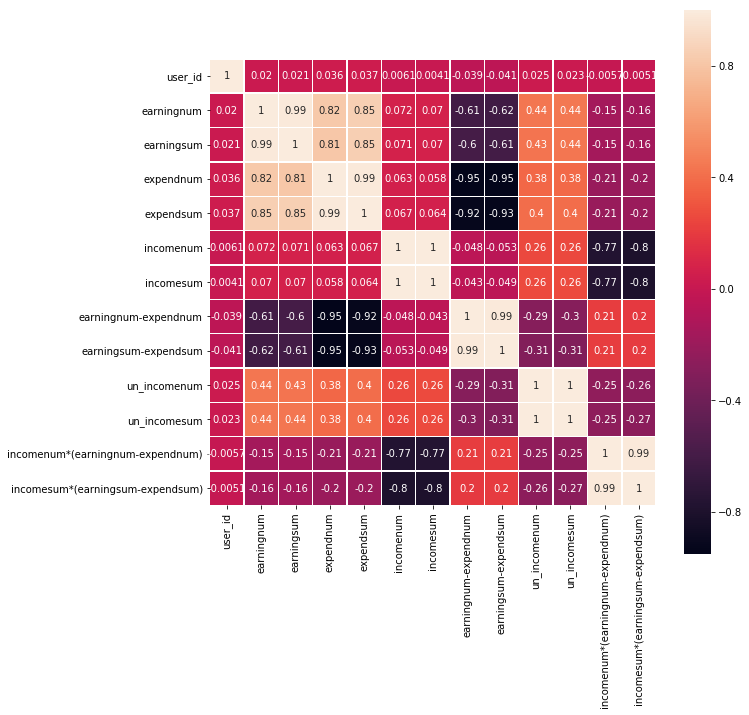

In [ ]:
internal_chars = bank_train.columns.values.tolist()
corrmat = bank_train[internal_chars].corr() #相关系数矩阵，即给出了任意两个变量之间的相关系数
plt.subplots(figsize=(10,10))  #figsize：整型元组，每英寸的宽度和高度
#square:设置热力图矩阵小块形状，默认值是False
#linewidths:定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小
#annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True) 

In [ ]:
internal_chars = bank_train.columns.values.tolist()
internal_chars

['user_id',
 'earningnum',
 'earningsum',
 'expendnum',
 'expendsum',
 'incomenum',
 'incomesum',
 'earningnum-expendnum',
 'earningsum-expendsum',
 'un_incomenum',
 'un_incomesum',
 'incomenum*(earningnum-expendnum)',
 'incomesum*(earningsum-expendsum)']

由上图可知，earningsum、earningnum、expendnum、expendsum可以相互替代，incomenum、incomesum、incomenum*(earningnum-expendnum)和incomesum*(earningsum-expendsum)可以相互替代，earningnum-expendnum和earningsum-expendsum可以相互替代，un_incomenum和un_incomesum可以相互替代，expendnum和earningnum-expendnum可以相互替代
所以删除expendnum、expendsum、incomenum*(earningnum-expendnum)、incomesum*(earningsum-expendsum)，保留earningsum/earningnum,incomesum/incomenum,(earningsum-expendsum)/(earningnum-expendnum),un_incomesum/un_incomenum

In [ ]:
browse_train = pd.read_csv('C:\\Users\\lkl\\Desktop\\competition\\forward\\browse_train.csv', index_col=0)   
browse_train.head()

,user_id,loantime,brows_beh before lending_sum,brows_beh before lending_max,brows_beh before lending_mean,brows_beh before lending_min,brows_beh before lending_std,brows_beh before lending_var,brows_num before lending_count,brows_num before lending_count（unique）
0,3,5914855887,38586.0,190.0,112.824561,35.0,50.366559,2536.790245,342.0,6.0
1,4,5914855887,38764.0,213.0,106.494505,35.0,54.240841,2942.068840,364.0,8.0
2,10,5914855887,36390.0,213.0,113.718750,31.0,58.105533,3376.252939,320.0,8.0
3,14,5914855887,20488.0,188.0,98.500000,23.0,53.447884,2856.676329,208.0,6.0
4,16,5914855887,17703.0,201.0,115.705882,28.0,57.247487,3277.274768,153.0,7.0


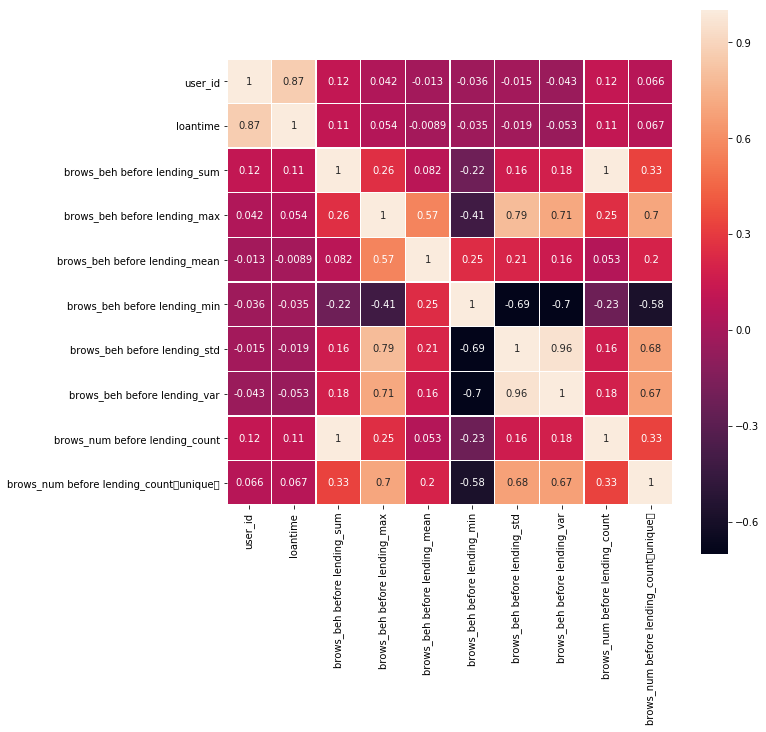

In [ ]:
internal_chars = browse_train.columns.values.tolist()
corrmat = browse_train[internal_chars].corr() #相关系数矩阵，即给出了任意两个变量之间的相关系数
plt.subplots(figsize=(10,10))  #figsize：整型元组，每英寸的宽度和高度
#square:设置热力图矩阵小块形状，默认值是False
#linewidths:定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小
#annot(annotate的缩写):默认取值False；如果是True，在热力图每个方格写入数据
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True) 

删除brows_beh before lending_std

In [ ]:
browse_train2 = browse_train
browse_train2.drop(['brows_beh before lending_std'], axis=1, inplace=True)

In [ ]:
#构造新特征
bank_train['earning_avg'] = bank_train.apply(lambda x:x.earningsum/x.earningnum,axis=1) ##将函数应用到由各列形成的一维数组上
bank_train['income_avg'] = bank_train.apply(lambda x:x.incomesum/x.incomenum,axis=1)
bank_train['un_income_avg'] = bank_train.apply(lambda x:x.un_incomesum/x.un_incomenum,axis=1)
bank_train['savingsum'] = bank_train.apply(lambda x:x.earningsum-x.expendsum,axis=1) 
bank_train['savingnum'] = bank_train.apply(lambda x:x.earningnum-x.expendnum,axis=1)
bank_train['saving_avg'] = bank_train.apply(lambda x:x.savingsum/x.savingnum,axis=1)
bank_train.head()

E:\Anaconda3-2018.12\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
E:\Anaconda3-2018.12\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3-2018.12\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
E:\Anaconda3-2018.12\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
E:\Anaconda3-2018.12\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


,user_id,earningnum,earningsum,expendnum,expendsum,incomenum,incomesum,earningnum-expendnum,earningsum-expendsum,un_incomenum,un_incomesum,incomenum*(earningnum-expendnum),incomesum*(earningsum-expendsum),earning_avg,income_avg,un_income_avg,savingsum,savingnum,saving_avg
0,1265,124.0,1695.142678,290.0,3610.695042,0.0,0.000000,-166.0,-1915.552364,0.0,0.000000,0.0,0.00000,13.670505,NaN,NaN,-1915.552364,-166.0,11.539472
1,2583,213.0,2736.475318,618.0,7064.310678,0.0,0.000000,-405.0,-4327.835360,0.0,0.000000,0.0,0.00000,12.847302,NaN,NaN,-4327.835360,-405.0,10.686013
2,29165,189.0,2277.607807,473.0,5099.861165,14.0,202.630532,-284.0,-2822.253358,175.0,2074.977275,-3976.0,-571874.69937,12.050835,14.473609,11.857013,-2822.253358,-284.0,9.937512
3,2443,252.0,3020.288782,341.0,3762.790364,0.0,0.000000,-89.0,-742.501582,0.0,0.000000,0.0,0.00000,11.985273,NaN,NaN,-742.501582,-89.0,8.342714
4,590,281.0,3684.672002,842.0,8621.443967,0.0,0.000000,-561.0,-4936.771965,0.0,0.000000,0.0,0.00000,13.112712,NaN,NaN,-4936.771965,-561.0,8.799950


In [ ]:
bank_train2 = bank_train
bank_train2.drop(['expendnum','expendsum','incomenum*(earningnum-expendnum)','incomesum*(earningsum-expendsum)','savingsum','savingnum',
                  'earningnum','earningsum','incomenum','incomesum','earningnum-expendnum','earningsum-expendsum','un_incomenum','un_incomesum'
                 ],
                 axis=1, inplace=True)

In [ ]:
bank_train2.head()

,user_id,earning_avg,income_avg,un_income_avg,saving_avg
0,1265,13.670505,NaN,NaN,11.539472
1,2583,12.847302,NaN,NaN,10.686013
2,29165,12.050835,14.473609,11.857013,9.937512
3,2443,11.985273,NaN,NaN,8.342714
4,590,13.112712,NaN,NaN,8.799950


In [ ]:
bank_train2.isnull().sum()

user_id             0
earning_avg         1
income_avg       3524
un_income_avg    3526
saving_avg          2
dtype: int64

In [ ]:
bank_train2=bank_train2.fillna(0)

In [ ]:
train_128 = pd.read_csv('C:\\Users\\lkl\\Desktop\\competition\\forward\\train_128.csv', index_col=0)   
train_128.head()

,sex_0,earning_avg,cur_bill_bal_max,last_bill_amount_max,borrow_cash_max,last_repay_amount_max,cur_bill_minrepay_max,last_repay_amount_median,last_repay_amount_mean,credit_amount_max,...,last_repay_amount_var - last_bill_amount_var,brows_num before lending_9,repay_status_var,repay_status_mean,avail_bal_median,avail_bal_min - borrow_cash_min,education_1,avail_bal_std,adjust_amount_mean,overdue
0,0,0.747671,-0.017807,0.244485,0.388831,0.475645,0.312167,0.630128,0.182785,0.024708,...,2.387035,-0.105924,-0.058799,-0.058783,-0.118967,0.456795,0,-0.48502,-0.101859,0
1,0,0.003272,0.178527,0.198568,0.470350,0.129631,0.320637,0.399775,0.376175,0.238106,...,0.002415,-0.105924,-0.058799,-0.058783,-0.118967,0.456795,0,-0.48502,-0.101859,0
2,0,-0.716950,-0.834782,-3.439191,0.162801,-0.009357,-0.297438,0.601220,-0.058413,0.143676,...,1.872173,-0.105924,-0.058799,-0.058783,-0.118967,0.456795,0,-0.48502,-0.101859,0
3,0,-0.776236,0.939154,0.632194,0.763657,0.439987,1.632045,-1.925280,-1.624986,0.603426,...,2.520509,-0.105924,-0.058799,-0.058783,-0.118967,0.456795,0,-0.48502,0.076651,0
4,0,0.243274,-0.061245,0.227023,0.388831,0.226024,-0.034395,0.756172,0.643010,0.091707,...,1.548818,-0.105924,-0.058799,-0.058783,-0.118967,0.456795,0,-0.48502,-0.101859,1


In [ ]:
train_128.shape

(5298, 129)

In [ ]:
train_128['overdue'].value_counts()

0    4524
1     774
Name: overdue, dtype: int64

In [ ]:
internal_chars2 = train_128.columns.values.tolist()
del internal_chars2[-1]

In [ ]:
x = train_128[internal_chars2]
x = np.array(x)
y = train_128[['overdue']]
y = np.array(y)

In [ ]:
#拆分训练集和测试集数据：比例为4:1
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
print("x_train_shape:", x_train.shape, " y_train_shape:", y_train.shape)
print("x_test_shape:", x_test.shape,"  y_test_shape:", y_test.shape)

x_train_shape: (4238, 128)  y_train_shape: (4238, 1)
x_test_shape: (1060, 128)   y_test_shape: (1060, 1)


In [ ]:
from collections import Counter
x = train_128[internal_chars2]
y = train_128[['overdue']]
print(Counter(y))

Counter({'overdue': 1})


In [ ]:
# 使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X,Y = smo.fit_sample(x, y)
print(Counter(Y))
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print(len(x_train))
print(len(x_test))

Counter({0: 4524, 1: 4524})
6333
2715


E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#设定决策树参数，进行建模。这里采用的是决策树里的CART法，之所以不用ID3和C4.5，是因为这两个方法不能处理连续型数据，必须转换成离散型。
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred = y_pred[:, np.newaxis]
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [ ]:
print("train score:", clf.score(x_train, y_train))
print("test score:", clf.score(x_test, y_test))

train score: 1.0
test score: 0.8055248618784531


In [ ]:
#利用GridSearchCV求最优参数,多组参数之间选择最优参数
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 1, 100)
gini_thresholds = np.linspace(0, 0.2, 100)
#设置参数矩阵,GridSearchCV会针对列表中的每个字典进行迭代，最终比较列表中每个字典所对应的参数组合，选择出最优的参数：
param_grid = [{'criterion': ['entropy'], 'min_impurity_decrease': entropy_thresholds}, #第一个字典选择信息墒作为判断标准，取值0～1范围50等分
              {'criterion': ['gini'], 'min_impurity_decrease': gini_thresholds},]       #第二个字典选择基尼系数，取值0～0.2范围50等分
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')  #scoring :准确度评价标准，默认None,使用estimator的误差估计函数
clf.fit(x, y)
print("best param:{0}\nbest score:{1}".format(clf.best_params_, clf.best_score_))

best param:{'criterion': 'entropy', 'min_impurity_decrease': 0.010101010101010102}
best score:0.853907134767837


In [ ]:
param_grid = [{'max_depth': np.arange(2,10)}]
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
clf.fit(x, y)
print("best param:{0}\nbest score:{1}".format(clf.best_params_, clf.best_score_))

best param:{'max_depth': 3}
best score:0.8516421291053228


In [ ]:
param_grid = [{'min_samples_split': np.arange(60,90,2)}]
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
clf.fit(x, y)
print("best param:{0}\nbest score:{1}".format(clf.best_params_, clf.best_score_))

best param:{'min_samples_split': 82}
best score:0.8199320498301246


In [ ]:
#模型结果评价
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn import metrics

model = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=76,min_impurity_decrease=0.010101010101010102)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("tees_score:", model.score(x_test, y_test))

tees_score: 0.8452830188679246


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(x,y)
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(x)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

E:\Anaconda3-2018.12\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3-2018.12\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8212533031332578
AUC Score (Train): 0.999300


E:\Anaconda3-2018.12\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda3-2018.12\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(X,Y)
print(rf0.oob_score_)
Y_predprob = rf0.predict_proba(X)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(Y, Y_predprob))

E:\Anaconda3-2018.12\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8367595048629531
AUC Score (Train): 0.999963


E:\Anaconda3-2018.12\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda3-2018.12\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
param_test1 = {'n_estimators':range(10,151,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x,y)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

({'mean_fit_time': array([0.11506362, 0.21133265, 0.30653052, 0.39943323, 0.51718249,
         0.61588655, 0.70749865, 0.78333869, 0.88024259, 1.01391835,
         1.12451186, 1.2289701 , 1.32003913, 1.46686993, 1.51836891]),
  'std_fit_time': array([0.01442464, 0.00862031, 0.01008137, 0.00699661, 0.03042859,
         0.01282174, 0.0268784 , 0.00326336, 0.02072988, 0.04956795,
         0.04572445, 0.03226822, 0.01532125, 0.08089201, 0.01929618]),
  'mean_score_time': array([0.00938358, 0.00081825, 0.00624008, 0.01020885, 0.00938115,
         0.01249809, 0.01260657, 0.01562214, 0.01562686, 0.01561379,
         0.01873984, 0.01562653, 0.01561356, 0.0187418 , 0.01905422]),
  'std_score_time': array([7.66167453e-03, 1.63650513e-03, 7.64251841e-03, 6.75751089e-03,
         7.65968924e-03, 6.24904676e-03, 6.30677010e-03, 3.55875171e-06,
         1.24658038e-05, 1.63604490e-05, 6.25175225e-03, 1.05494227e-05,
         1.64933279e-05, 6.25017144e-03, 6.86559739e-03]),
  'param_n_estimators': m

In [ ]:
#param_test1 = {'n_estimators':range(10,901,10)}
#gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  #min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       #param_grid = param_test1, scoring='roc_auc',cv=5)
#gsearch1.fit(X,Y)
#gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

这样我们得到了最佳的弱学习器迭代次数，接着我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

In [ ]:
param_test2 = {'max_depth':range(3,8,2), 'min_samples_split':range(10,71,10)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 140, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(x,y)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

({'mean_fit_time': array([0.73794789, 0.74026222, 0.73295646, 0.7559998 , 0.74750476,
         0.76712089, 0.75945582, 1.10368085, 1.08290815, 1.13119159,
         1.09142137, 1.12557769, 1.13080139, 1.08937578, 1.39007773,
         1.3904995 , 1.3783011 , 1.40995564, 1.38466864, 1.41545424,
         1.39198771]),
  'std_fit_time': array([0.00955591, 0.01442055, 0.00876518, 0.04531457, 0.00704424,
         0.0091839 , 0.02612821, 0.02306829, 0.0160117 , 0.04125361,
         0.01558253, 0.03573117, 0.0578214 , 0.01880144, 0.0295961 ,
         0.02553947, 0.01983163, 0.04175867, 0.02620015, 0.02852761,
         0.02690029]),
  'mean_score_time': array([0.01251059, 0.01260695, 0.0156096 , 0.01561532, 0.01561146,
         0.01573339, 0.01562033, 0.01562047, 0.01874776, 0.01582675,
         0.01575475, 0.01584525, 0.01561408, 0.01562328, 0.01908712,
         0.01581693, 0.01875205, 0.0156219 , 0.01875191, 0.02187161,
         0.01743369]),
  'std_score_time': array([6.25531123e-03, 6.307551

In [ ]:
param_test2 = {'max_depth':range(8,15,1), 'min_samples_split':range(2,8,1)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,Y)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py

({'mean_fit_time': array([1.43029571, 1.39278932, 1.39103622, 1.43435984, 1.38498712,
         1.37148743, 1.45307145, 1.44201679, 1.45560322, 1.44322214,
         1.45804267, 1.43556018, 1.49385576, 1.53737679, 1.54631891,
         1.50571995, 1.52913651, 1.52138071, 1.58432074, 1.57916121,
         1.58894315, 1.55467014, 1.57770696, 1.61248717, 1.6194313 ,
         1.57734747, 1.57462053, 1.59234595, 1.62118044, 1.62660451,
         1.60046525, 1.5897676 , 1.58690872, 1.65185208, 1.71377058,
         1.67220426, 1.71245165, 1.605023  , 1.59699202, 1.61020226,
         1.6108851 , 1.59530644]),
  'std_fit_time': array([0.05370292, 0.01917454, 0.01540271, 0.05531211, 0.02422849,
         0.01931871, 0.01723589, 0.01055216, 0.01355031, 0.01404598,
         0.03067345, 0.01798086, 0.00720206, 0.0200605 , 0.05142794,
         0.01411812, 0.02667955, 0.03529998, 0.0506976 , 0.01654523,
         0.03087467, 0.02152763, 0.02268754, 0.04194666, 0.04952777,
         0.03201682, 0.02283881, 0.

In [ ]:
#现在模型的袋外分数
rf1 = RandomForestClassifier(n_estimators= 140, max_depth=7, min_samples_split=50,
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10)
rf1.fit(x,y)
print(rf1.oob_score_)

E:\Anaconda3-2018.12\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.853907134767837


In [ ]:
#现在模型的袋外分数
rf1 = RandomForestClassifier(n_estimators= 70, max_depth=13, min_samples_split=2,
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10)
rf1.fit(X,Y)
print(rf1.oob_score_)

0.884394341290893


对于内部节点再划分所需最小样本数min_samples_split，我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。

In [ ]:
param_test3 = {'min_samples_split':range(2,10,2), 'min_samples_leaf':range(2,20,2)}  #生成子节点所需的最小样本数\叶节点所需的最小样本数
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 140, max_depth=7,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(x,y)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

({'mean_fit_time': array([1.48302522, 1.50406141, 1.44605036, 1.54798064, 1.58541269,
         1.47871857, 1.44134517, 1.43340759, 1.41802645, 1.42608733,
         1.44837747, 1.44890709, 1.43372684, 1.42542171, 1.42435904,
         1.4253737 , 1.42795749, 1.42999902, 1.42535281, 1.42964211,
         1.42053843, 1.42370696, 1.43431544, 1.45156078, 1.44288363,
         1.40274205, 1.43275971, 1.41225863, 1.38619585, 1.37411222,
         1.36975503, 1.38277311, 1.37083597, 1.37577834, 1.36160064,
         1.37356234]),
  'std_fit_time': array([0.05110795, 0.08397194, 0.01965586, 0.03549375, 0.04231504,
         0.03283955, 0.01395106, 0.01594292, 0.01190238, 0.01654537,
         0.04275739, 0.02516687, 0.05127961, 0.03502222, 0.019662  ,
         0.01697701, 0.02382449, 0.03038934, 0.00987175, 0.01787283,
         0.02008979, 0.0299527 , 0.02577788, 0.01282093, 0.01139534,
         0.02052876, 0.01696982, 0.03105994, 0.01204053, 0.01302701,
         0.01772477, 0.00903718, 0.01518704, 0.

In [ ]:
param_test3 = {'min_samples_split':range(2,10,2), 'min_samples_leaf':range(2,10,2)}  #生成子节点所需的最小样本数\叶节点所需的最小样本数
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=13,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,Y)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py

({'mean_fit_time': array([1.87175846, 1.86705594, 1.86523757, 1.88389158, 1.87152352,
         1.88375959, 1.85237846, 1.87937379, 1.83150344, 1.80267353,
         1.79709425, 1.81842146, 1.77271323, 1.77481017, 1.78170161,
         1.7624547 ]),
  'std_fit_time': array([0.01751711, 0.0167834 , 0.01004936, 0.04859862, 0.0253847 ,
         0.03404391, 0.01484502, 0.02341375, 0.02644428, 0.01669722,
         0.02615707, 0.00840078, 0.02986197, 0.0293    , 0.00607934,
         0.01894473]),
  'mean_score_time': array([0.03123751, 0.02511744, 0.01874714, 0.02230453, 0.01597633,
         0.01561704, 0.02208457, 0.01873899, 0.0157299 , 0.02543221,
         0.01874833, 0.0221921 , 0.01886816, 0.01583548, 0.01561079,
         0.01873035]),
  'std_score_time': array([3.12312127e-02, 7.51786301e-03, 6.25143061e-03, 8.18308767e-03,
         4.46483860e-04, 6.18161952e-06, 7.51636466e-03, 6.23416924e-03,
         1.99721409e-04, 8.03511820e-03, 6.24678320e-03, 8.04722012e-03,
         6.21430606e-

In [ ]:
#最后我们再对最大特征数max_features做调参
param_test4 = {'max_features':range(3,15,2)}          #最佳分割点要考虑的特征数量
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 140, max_depth=7, min_samples_split=2,
                                  min_samples_leaf=18 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(x,y)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3-2018.12\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score

({'mean_fit_time': array([0.51029749, 0.73500891, 0.97428889, 1.15371103, 1.3816309 ,
         1.5829072 ]),
  'std_fit_time': array([0.00683425, 0.00900951, 0.02360595, 0.01442805, 0.01725334,
         0.01084945]),
  'mean_score_time': array([0.01563511, 0.01884203, 0.0156147 , 0.01371779, 0.01562171,
         0.02186275]),
  'std_score_time': array([2.78950145e-05, 6.45684083e-03, 1.34484987e-05, 4.34624957e-03,
         1.32660177e-06, 7.64446220e-03]),
  'param_max_features': masked_array(data=[3, 5, 7, 9, 11, 13],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 3},
   {'max_features': 5},
   {'max_features': 7},
   {'max_features': 9},
   {'max_features': 11},
   {'max_features': 13}],
  'split0_test_score': array([0.65351631, 0.65200499, 0.65435038, 0.66121547, 0.6573445 ,
         0.6551702 ]),
  'split1_test_score': array([0.6728355 , 0.68029228, 0.68043486, 0.67652112, 0.678738

In [ ]:
#最后我们再对最大特征数max_features做调参
param_test4 = {'max_features':range(3,15,2)}          #最佳分割点要考虑的特征数量
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=13, min_samples_split=2,
                                  min_samples_leaf=2 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X,Y)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
rf2 = RandomForestClassifier(n_estimators= 70, max_depth=13, min_samples_split=2,
                                  min_samples_leaf=2,max_features=9 ,oob_score=True, random_state=10)
rf2.fit(X,Y)
print(rf2.oob_score_)